<a href="https://colab.research.google.com/github/srabinarayan/Is-it-Cat-or-Dog-/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#enable tpu and check whether it is working or not
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.103.153.250:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.103.153.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.153.250:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.backend import cast
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dropout,Flatten,BatchNormalization,Dense,Activation,ZeroPadding2D
from keras.callbacks import Callback,EarlyStopping,History,ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [ ]:
import os
os.environ['KAGGLE_USERNAME']="rabinarayanswain"
os.environ['KAGGLE_KEY']="3a296a271c8de48ac4dca426f2822d28"
!kaggle competitions download -c dogs-vs-cats

 94% 256M/271M [00:03<00:00, 104MB/s] 
100% 271M/271M [00:04<00:00, 70.6MB/s]
 99% 537M/543M [00:05<00:00, 123MB/s]
100% 543M/543M [00:05<00:00, 111MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 87.1MB/s]


In [ ]:
#unzip train file
from zipfile import ZipFile
file_name="/content/train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")


#unzip test file
from zipfile import ZipFile
file_name="/content/test1.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done") 

done
done


In [ ]:
#create directories and sub-directories
try:
  os.mkdir('/content/cat-vs-dog')
  os.mkdir('/content/cat-vs-dog/training')
  os.mkdir('/content/cat-vs-dog/validation')
  os.mkdir('/content/cat-vs-dog/testing')
  os.mkdir('/content/cat-vs-dog/testing/cats')
  os.mkdir('/content/cat-vs-dog/testing/dogs')
  os.mkdir('/content/cat-vs-dog/training/cats')
  os.mkdir('/content/cat-vs-dog/training/dogs')
  os.mkdir('/content/cat-vs-dog/validation/cats')
  os.mkdir('/content/cat-vs-dog/validation/dogs')
except OSError:
  pass  

In [ ]:
original = "/content/train"
original_test="/content/test1"
test_cat_dir="/content/cat-vs-dog/testing/cats"
test_dog_dir="/content/cat-vs-dog/testing/dogs"
train_cats_dir = "/content/cat-vs-dog/training/cats"
validation_cats_dir = "/content/cat-vs-dog/validation/cats"
train_dogs_dir = "/content/cat-vs-dog/training/dogs"
validation_dogs_dir = "/content/cat-vs-dog/validation/dogs"
training_dir="/content/cat-vs-dog/training"
validation_dir="/content/cat-vs-dog/validation"

In [ ]:
#feed images into respective sub-directories
import shutil
fnames=['cat.{}.jpg'.format(i) for i in range(11250)]
for fname in fnames:
  source=os.path.join(original,fname)
  destination=os.path.join(train_cats_dir,fname)
  shutil.copyfile(source,destination)
fnames=['cat.{}.jpg'.format(i) for i in range(11250,12500)]
for fname in fnames:
  source=os.path.join(original,fname)
  destination=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(source,destination)  

fnames=['dog.{}.jpg'.format(i) for i in range(11250)]
for fname in fnames:
  source=os.path.join(original,fname)
  destination=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(source,destination)
fnames=['dog.{}.jpg'.format(i) for i in range(11250,12500)]
for fname in fnames:
  source=os.path.join(original,fname)
  destination=os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(source,destination)       


In [ ]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

11250
11250
1250
1250


In [ ]:
#Augment training data and validating data

train_datagen = ImageDataGenerator(    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
#validation generator
valid_datagen  = ImageDataGenerator(rescale=1./255.)

In [ ]:
#function to generate images of given sizes
def create(width,height,channel):
    train = train_datagen.flow_from_directory(
    training_dir,
    target_size=(width,height),
    class_mode='binary',
    batch_size=64)
    print(train.class_indices)


    valid = valid_datagen.flow_from_directory( 
    validation_dir,
    target_size=(width,height),
    class_mode='binary',
    batch_size=64)

    
    
    return train,valid

In [ ]:
#slow down the learning rate as the training progresses towards global minima
def scheduler(epoch,lr):
    decay_rate = 0.0005
    new_lrate = lr/(1+decay_rate*epoch)
    return new_lrate
schedule=LearningRateScheduler(scheduler) 

In [ ]:
#reduce learning rate when loss stops improving
ReduceLR=ReduceLROnPlateau(monitor='val_loss', 
                                     factor=0.5, 
                                     verbose=1,
                                     patience=3,
                                     mode='auto',
                                     min_lr=0.00001
                                     )

In [ ]:
train,valid=create(150,150,3)

Found 22500 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
Found 2500 images belonging to 2 classes.


In [ ]:
#CNN Architecture
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3),kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=3,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=3,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=3,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)      

In [ ]:
model_save = ModelCheckpoint('best_model.hdf5',
save_best_only=True,monitor='val_acc',mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5,mode='min')

In [ ]:
history=model.fit_generator(train,
                            steps_per_epoch=22500//64,
                            epochs=30,
                            validation_data=valid,
                            validation_steps=2500//64,
                            callbacks=[model_save,early_stopping,ReduceLR])

Epoch 1/30
351/351 [==============================] - 214s 610ms/step - loss: 0.8773 - accuracy: 0.5622 - val_loss: 0.6615 - val_accuracy: 0.6418
Epoch 2/30


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


351/351 [==============================] - 213s 607ms/step - loss: 0.6437 - accuracy: 0.6131 - val_loss: 0.5802 - val_accuracy: 0.6950
Epoch 3/30
351/351 [==============================] - 197s 560ms/step - loss: 0.5969 - accuracy: 0.6748 - val_loss: 0.6280 - val_accuracy: 0.6622
Epoch 4/30
351/351 [==============================] - 203s 578ms/step - loss: 0.5688 - accuracy: 0.7050 - val_loss: 0.5282 - val_accuracy: 0.7443
Epoch 5/30
351/351 [==============================] - 205s 585ms/step - loss: 0.5311 - accuracy: 0.7353 - val_loss: 0.5368 - val_accuracy: 0.7853
Epoch 6/30
351/351 [==============================] - 200s 569ms/step - loss: 0.5081 - accuracy: 0.7535 - val_loss: 0.5362 - val_accuracy: 0.8103
Epoch 7/30
351/351 [==============================] - 201s 571ms/step - loss: 0.4743 - accuracy: 0.7770 - val_loss: 0.5023 - val_accuracy: 0.8190
Epoch 8/30
351/351 [==============================] - 201s 572ms/step - loss: 0.4587 - accuracy: 0.7866 - val_loss: 0.4208 - val_accura

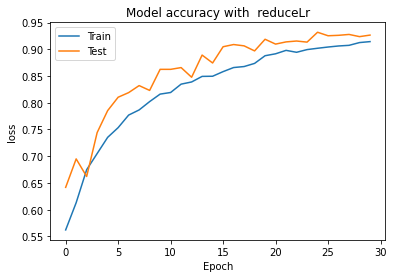

In [ ]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy with  reduceLr')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

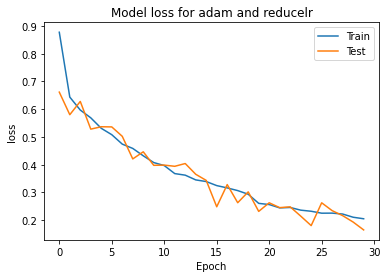

In [ ]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Make it pretty
plt.title('Model loss for adam and reducelr')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
test_dir="/content/test1"
files=[f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir,f))]
print(type(files[0]))

<class 'str'>


In [ ]:
predict_path=os.mkdir('/content/cat-vs-dog/predict')

FileExistsError: ignored

In [ ]:
from keras.preprocessing import   image 
import numpy as np
predict_path="/content/test1/"
prediction={'image':[],'label':[]}
dog_counter = 0 
cat_counter  = 0
for file in files:
    img = image.load_img(predict_path+file, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        cat_counter += 1
        prediction['image'].append(file)
        prediction['label'].append('cat')
    else:
        dog_counter += 1
        prediction['image'].append(file)
        prediction['label'].append('dog')


In [ ]:
import pandas as pd
prediction_df=pd.DataFrame(prediction)

In [ ]:
prediction_df.loc[5,:]

image    3737.jpg
label         cat
Name: 5, dtype: object

In [ ]:
sample_prediction=prediction_df.sample(18)

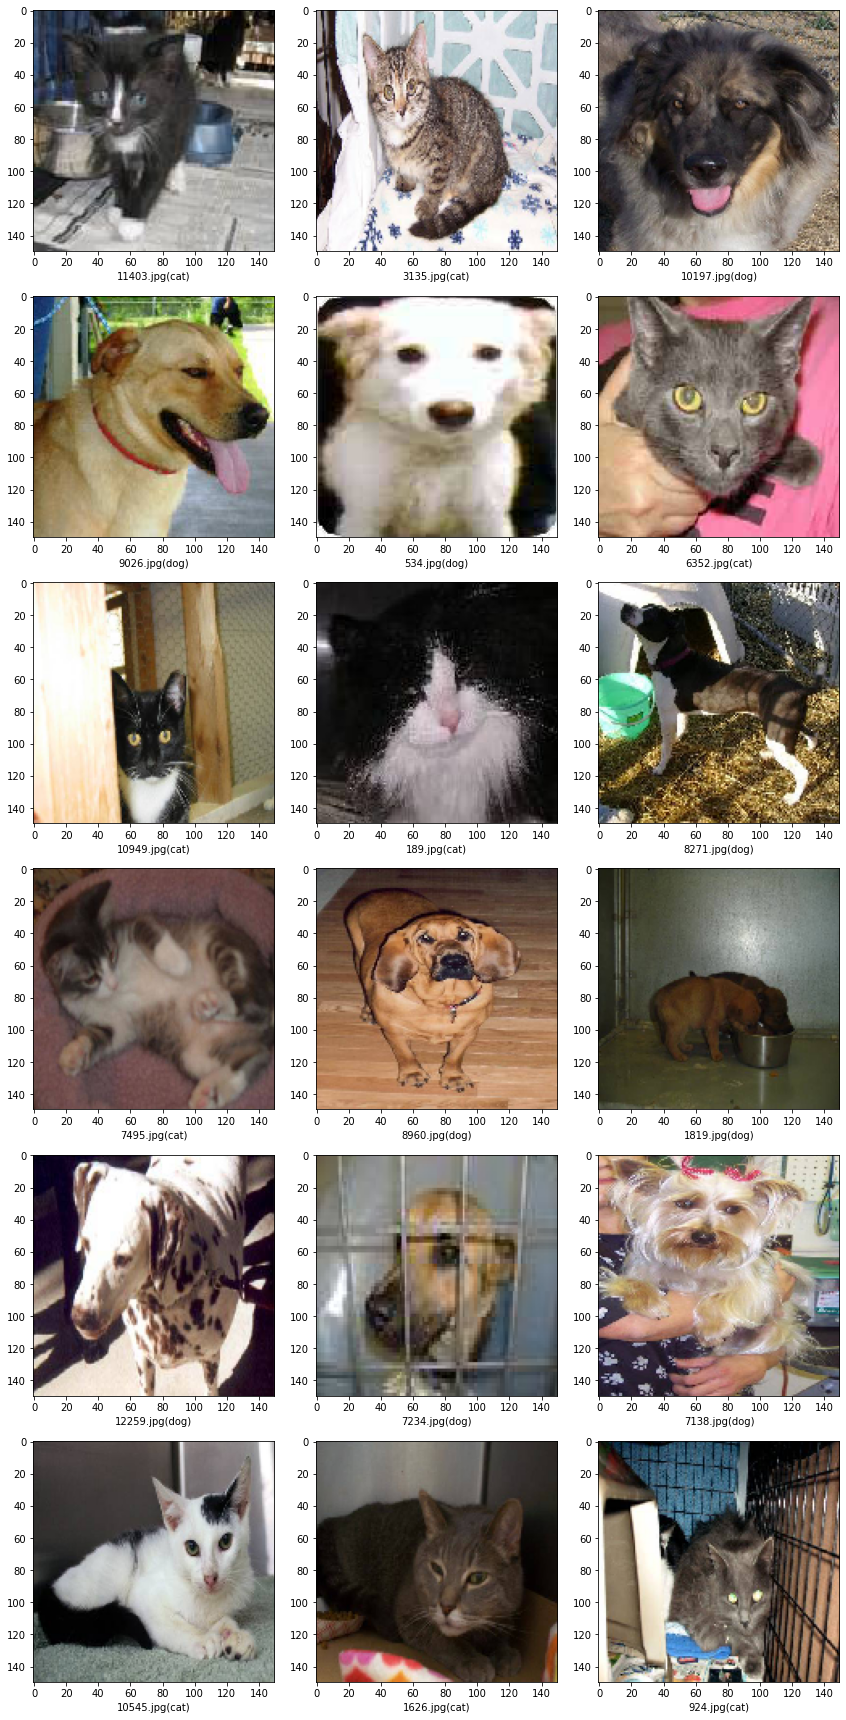

In [ ]:
plt.figure(figsize=(12, 24))
index=1
for ind in sample_prediction.index:
    filename = sample_prediction['image'][ind]
    category = sample_prediction['label'][ind]
    img = load_img("/content/test1/"+filename, target_size=(150,150))
    plt.subplot(6, 3,index)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
    index=index+1
plt.tight_layout()
plt.show()

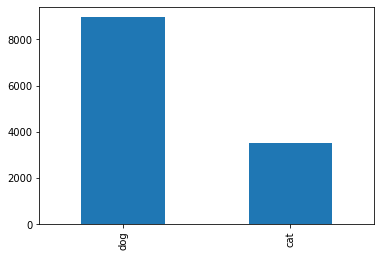

In [ ]:
prediction_df['label'].value_counts().plot.bar()

# Transfer Learning

## ResNet

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-07-02 14:08:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  89.7MB/s    in 0.9s    

2020-07-02 14:08:59 (89.7 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained=InceptionV3(include_top=False,weights=None,input_shape=(150,150,3))

In [ ]:
pre_trained.load_weights(local_weights_file)
for layer in pre_trained.layers:
  layer.trainable = False

In [ ]:
pre_trained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history=model.fit(train,steps_per_epoch=100,
                            epochs=20,
                            validation_data=valid,
                            validation_steps=50,verbose=2)

Epoch 1/20


NotFoundError: ignored

In [ ]:
print(tf.__version__)

2.2.0
